In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore,boxcox
from sklearn.metrics import mean_squared_error,mean_absolute_error,confusion_matrix,r2_score,classification_report,accuracy_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge
from sklearn.svm import SVC,SVR
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,GradientBoostingRegressor,AdaBoostRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.naive_bayes import GaussianNB,MultinomialNB
import joblib
from pandas.api.types import is_string_dtype,is_numeric_dtype



In [218]:
df=pd.read_csv('Crime_Dataset.csv')

In [219]:
df.head()

,STATE/UT,CRIME HEAD,CASES REGISTERED - 2010,CASES CHARGESHEETED - 2010,CASES CONVICTED - 2010,PERSONS ARRESTED - 2010,PERSONS CHARGESHEETED - 2010,PERSONS CONVICTED - 2010,CASES REGISTERED - 2011,CASES CHARGESHEETED - 2011,CASES CONVICTED - 2011,PERSONS ARRESTED - 2011,PERSONS CHARGESHEETED - 2011,PERSONS CONVICTED - 2011,CASES REGISTERED - 2012,CASES CHARGESHEETED - 2012,CASES CONVICTED - 2012,PERSONS ARRESTED - 2012,PERSONS CHARGESHEETED - 2012,PERSONS CONVICTED - 2012
0,ANDHRA PRADESH,RAPE,1362,1210,141,1761,1674,173,1442,1216,111,1758,1783,157,1341,1276,108,1664,1608,178
1,ARUNACHAL PRADESH,RAPE,47,34,4,49,40,4,42,38,4,47,41,4,46,24,3,47,24,3
2,ASSAM,RAPE,1721,1110,95,1629,1153,117,1700,1012,179,1470,1080,165,1716,1110,97,1626,1156,153
3,BIHAR,RAPE,795,533,227,892,816,280,934,820,210,1185,1036,246,927,902,119,1327,1398,161
4,CHHATTISGARH,RAPE,1012,942,204,1198,1203,270,1053,1027,217,1257,1253,240,1034,988,223,1214,1201,259


In [220]:
df.shape

(456, 20)

In [221]:
df.dtypes

STATE/UT                        object
CRIME HEAD                      object
CASES REGISTERED - 2010          int64
CASES CHARGESHEETED - 2010       int64
CASES CONVICTED - 2010           int64
PERSONS ARRESTED - 2010          int64
PERSONS CHARGESHEETED - 2010     int64
PERSONS CONVICTED - 2010         int64
CASES REGISTERED - 2011          int64
CASES CHARGESHEETED - 2011       int64
CASES CONVICTED - 2011           int64
PERSONS ARRESTED - 2011          int64
PERSONS CHARGESHEETED - 2011     int64
PERSONS CONVICTED - 2011         int64
CASES REGISTERED - 2012          int64
CASES CHARGESHEETED - 2012       int64
CASES CONVICTED - 2012           int64
PERSONS ARRESTED - 2012          int64
PERSONS CHARGESHEETED - 2012     int64
PERSONS CONVICTED - 2012         int64
dtype: object

In [222]:
df.isnull().sum()

STATE/UT                        0
CRIME HEAD                      0
CASES REGISTERED - 2010         0
CASES CHARGESHEETED - 2010      0
CASES CONVICTED - 2010          0
PERSONS ARRESTED - 2010         0
PERSONS CHARGESHEETED - 2010    0
PERSONS CONVICTED - 2010        0
CASES REGISTERED - 2011         0
CASES CHARGESHEETED - 2011      0
CASES CONVICTED - 2011          0
PERSONS ARRESTED - 2011         0
PERSONS CHARGESHEETED - 2011    0
PERSONS CONVICTED - 2011        0
CASES REGISTERED - 2012         0
CASES CHARGESHEETED - 2012      0
CASES CONVICTED - 2012          0
PERSONS ARRESTED - 2012         0
PERSONS CHARGESHEETED - 2012    0
PERSONS CONVICTED - 2012        0
dtype: int64

In [223]:
df.isin(['?']).sum()

STATE/UT                        0
CRIME HEAD                      0
CASES REGISTERED - 2010         0
CASES CHARGESHEETED - 2010      0
CASES CONVICTED - 2010          0
PERSONS ARRESTED - 2010         0
PERSONS CHARGESHEETED - 2010    0
PERSONS CONVICTED - 2010        0
CASES REGISTERED - 2011         0
CASES CHARGESHEETED - 2011      0
CASES CONVICTED - 2011          0
PERSONS ARRESTED - 2011         0
PERSONS CHARGESHEETED - 2011    0
PERSONS CONVICTED - 2011        0
CASES REGISTERED - 2012         0
CASES CHARGESHEETED - 2012      0
CASES CONVICTED - 2012          0
PERSONS ARRESTED - 2012         0
PERSONS CHARGESHEETED - 2012    0
PERSONS CONVICTED - 2012        0
dtype: int64

In [224]:
df.isin(['-']).sum()

STATE/UT                        0
CRIME HEAD                      0
CASES REGISTERED - 2010         0
CASES CHARGESHEETED - 2010      0
CASES CONVICTED - 2010          0
PERSONS ARRESTED - 2010         0
PERSONS CHARGESHEETED - 2010    0
PERSONS CONVICTED - 2010        0
CASES REGISTERED - 2011         0
CASES CHARGESHEETED - 2011      0
CASES CONVICTED - 2011          0
PERSONS ARRESTED - 2011         0
PERSONS CHARGESHEETED - 2011    0
PERSONS CONVICTED - 2011        0
CASES REGISTERED - 2012         0
CASES CHARGESHEETED - 2012      0
CASES CONVICTED - 2012          0
PERSONS ARRESTED - 2012         0
PERSONS CHARGESHEETED - 2012    0
PERSONS CONVICTED - 2012        0
dtype: int64

In [225]:
df.isin(['-1']).sum()

STATE/UT                        0
CRIME HEAD                      0
CASES REGISTERED - 2010         0
CASES CHARGESHEETED - 2010      0
CASES CONVICTED - 2010          0
PERSONS ARRESTED - 2010         0
PERSONS CHARGESHEETED - 2010    0
PERSONS CONVICTED - 2010        0
CASES REGISTERED - 2011         0
CASES CHARGESHEETED - 2011      0
CASES CONVICTED - 2011          0
PERSONS ARRESTED - 2011         0
PERSONS CHARGESHEETED - 2011    0
PERSONS CONVICTED - 2011        0
CASES REGISTERED - 2012         0
CASES CHARGESHEETED - 2012      0
CASES CONVICTED - 2012          0
PERSONS ARRESTED - 2012         0
PERSONS CHARGESHEETED - 2012    0
PERSONS CONVICTED - 2012        0
dtype: int64

In [226]:
df.dtypes

STATE/UT                        object
CRIME HEAD                      object
CASES REGISTERED - 2010          int64
CASES CHARGESHEETED - 2010       int64
CASES CONVICTED - 2010           int64
PERSONS ARRESTED - 2010          int64
PERSONS CHARGESHEETED - 2010     int64
PERSONS CONVICTED - 2010         int64
CASES REGISTERED - 2011          int64
CASES CHARGESHEETED - 2011       int64
CASES CONVICTED - 2011           int64
PERSONS ARRESTED - 2011          int64
PERSONS CHARGESHEETED - 2011     int64
PERSONS CONVICTED - 2011         int64
CASES REGISTERED - 2012          int64
CASES CHARGESHEETED - 2012       int64
CASES CONVICTED - 2012           int64
PERSONS ARRESTED - 2012          int64
PERSONS CHARGESHEETED - 2012     int64
PERSONS CONVICTED - 2012         int64
dtype: object

In [227]:
df['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'TOTAL (STATES)', 'A & N ISLANDS', 'CHANDIGARH',
       'D & N HAVELI', 'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP',
       'PUDUCHERRY', 'TOTAL (UTs)', 'TOTAL (ALL-INDIA)'], dtype=object)

In [228]:
place_df=pd.DataFrame(df['STATE/UT'].unique(),columns=['State/UT'])
place_df

,State/UT
0,ANDHRA PRADESH
1,ARUNACHAL PRADESH
2,ASSAM
3,BIHAR
4,CHHATTISGARH
5,GOA
6,GUJARAT
7,HARYANA
8,HIMACHAL PRADESH
9,JAMMU & KASHMIR


In [229]:
total_df=place_df[place_df['State/UT'].str.contains('TOTAL',na=False, case=False)]
total_df

,State/UT
28,TOTAL (STATES)
36,TOTAL (UTs)
37,TOTAL (ALL-INDIA)


In [230]:
place_df=place_df[~place_df['State/UT'].str.contains('TOTAL',na=False, case=False)]

In [231]:
place_df

,State/UT
0,ANDHRA PRADESH
1,ARUNACHAL PRADESH
2,ASSAM
3,BIHAR
4,CHHATTISGARH
5,GOA
6,GUJARAT
7,HARYANA
8,HIMACHAL PRADESH
9,JAMMU & KASHMIR


In [232]:
statewise_yearwise_df=df.groupby(['STATE/UT']).agg({'CASES REGISTERED - 2010':'sum','CASES REGISTERED - 2011':'sum','CASES REGISTERED - 2012':'sum'})
statewise_yearwise_df

,CASES REGISTERED - 2010,CASES REGISTERED - 2011,CASES REGISTERED - 2012
STATE/UT,,,
A & N ISLANDS,170,102,98
ANDHRA PRADESH,54488,56492,56342
ARUNACHAL PRADESH,380,342,402
ASSAM,23110,23006,27088
BIHAR,16942,20462,22458
CHANDIGARH,282,312,482
CHHATTISGARH,8352,8438,8456
D & N HAVELI,60,36,32
DAMAN & DIU,28,22,22


In [233]:
#df['Total_Case']= statewise_yearwise_df.iloc[:, 0:3].sum(axis=1)
#df['Total_Case']= statewise_yearwise_df.sum(axis=1)
statewise_count=pd.DataFrame([])
statewise_count=statewise_yearwise_df['CASES REGISTERED - 2010']+statewise_yearwise_df['CASES REGISTERED - 2011']+statewise_yearwise_df['CASES REGISTERED - 2012']



In [234]:
statewise_count=statewise_count.drop(labels=['TOTAL (ALL-INDIA)', 'TOTAL (STATES)','TOTAL (UTs)'])


In [235]:
statewise_count

STATE/UT
A & N ISLANDS           370
ANDHRA PRADESH       167322
ARUNACHAL PRADESH      1124
ASSAM                 73204
BIHAR                 59862
CHANDIGARH             1076
CHHATTISGARH          25246
D & N HAVELI            128
DAMAN & DIU              72
DELHI                 31422
GOA                     934
GUJARAT               53048
HARYANA               34110
HIMACHAL PRADESH       5874
JAMMU & KASHMIR       18170
JHARKHAND             21510
KARNATAKA             57534
KERALA                63362
LAKSHADWEEP               6
MADHYA PRADESH        99798
MAHARASHTRA           95636
MANIPUR                1482
MEGHALAYA              1570
MIZORAM                1072
NAGALAND                260
ODISHA                59844
PUDUCHERRY              530
PUNJAB                17464
RAJASTHAN            118352
SIKKIM                  330
TAMIL NADU            41680
TRIPURA                9190
UTTAR PRADESH        132754
UTTARAKHAND            6274
WEST BENGAL          172400
dtype: int6

Text(0, 0.5, 'State/UT')

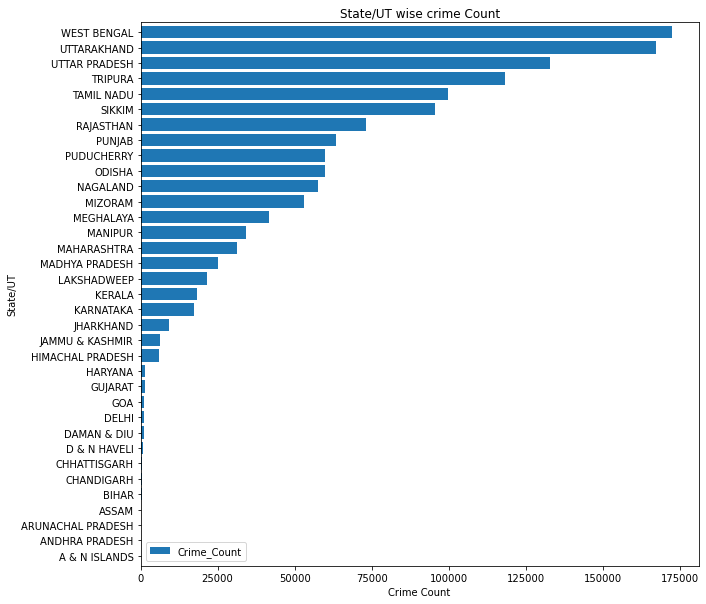

In [236]:
#Finding state wise crime count
#West Bengal has more crime compare to other state
bar_df = pd.DataFrame({'State/UT':statewise_count.index, 'Crime_Count':statewise_count.sort_values().values})
bar_df.plot(x='State/UT', y='Crime_Count', rot=0,kind='barh',figsize=(10,10),width=0.8)
plt.title("State/UT wise crime Count")

plt.xlabel("Crime Count")
plt.ylabel("State/UT")

In [237]:
df['CRIME HEAD'].unique()

array(['RAPE', 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'DOWRY DEATHS',
       'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO THE MODESTY OF WOMEN',
       'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRY',
       'IMMORAL TRAFFIC (P) ACT, 1956', 'DOWRY PROHIBITION ACT, 1961',
       'INDECENT REPRESENTATION OF WOMEN (PROHIBITION) ACT, 1986',
       'COMMISSION OF SATI (PREVENTION) ACT, 1987',
       'TOTAL CRIMES AGAINST WOMEN'], dtype=object)

In [238]:
df_filtered=df[(df['CRIME HEAD']=='TOTAL CRIMES AGAINST WOMEN') & (~df['STATE/UT'].str.contains('TOTAL'))]
df_filtered

,STATE/UT,CRIME HEAD,CASES REGISTERED - 2010,CASES CHARGESHEETED - 2010,CASES CONVICTED - 2010,PERSONS ARRESTED - 2010,PERSONS CHARGESHEETED - 2010,PERSONS CONVICTED - 2010,CASES REGISTERED - 2011,CASES CHARGESHEETED - 2011,CASES CONVICTED - 2011,PERSONS ARRESTED - 2011,PERSONS CHARGESHEETED - 2011,PERSONS CONVICTED - 2011,CASES REGISTERED - 2012,CASES CHARGESHEETED - 2012,CASES CONVICTED - 2012,PERSONS ARRESTED - 2012,PERSONS CHARGESHEETED - 2012,PERSONS CONVICTED - 2012
418,ANDHRA PRADESH,TOTAL CRIMES AGAINST WOMEN,27244,23851,3166,38570,39417,4472,28246,22550,2243,37766,36275,4366,28171,22524,2086,39288,39191,3527
419,ARUNACHAL PRADESH,TOTAL CRIMES AGAINST WOMEN,190,117,11,197,138,12,171,114,15,199,130,17,201,127,24,202,130,24
420,ASSAM,TOTAL CRIMES AGAINST WOMEN,11555,6293,522,12996,7496,833,11503,6037,762,11241,6953,739,13544,7524,430,12346,7694,637
421,BIHAR,TOTAL CRIMES AGAINST WOMEN,8471,5281,861,13134,12422,1554,10231,8519,1031,18157,15563,1776,11229,8970,682,20147,19282,1317
422,CHHATTISGARH,TOTAL CRIMES AGAINST WOMEN,4176,3917,860,6577,6481,1343,4219,4054,842,6423,6447,1227,4228,4108,1050,6594,6566,1605
423,GOA,TOTAL CRIMES AGAINST WOMEN,140,127,13,214,217,16,127,109,12,159,155,12,200,82,6,286,127,7
424,GUJARAT,TOTAL CRIMES AGAINST WOMEN,8148,7690,228,20459,20277,974,8815,8334,157,22223,22232,346,9561,9017,199,23965,23525,434
425,HARYANA,TOTAL CRIMES AGAINST WOMEN,5562,3960,903,7540,7232,1712,5491,3908,952,6696,6725,1369,6002,4314,852,7264,7429,1266
426,HIMACHAL PRADESH,TOTAL CRIMES AGAINST WOMEN,1028,817,51,1481,1464,97,997,764,72,1268,1219,110,912,745,72,1325,1317,107
427,JAMMU & KASHMIR,TOTAL CRIMES AGAINST WOMEN,2611,1813,145,3569,3544,215,3146,2514,143,5098,5089,194,3328,2639,219,5204,5203,338


In [239]:
df_womencrime_count=df_filtered.groupby(['STATE/UT']).agg({'CASES REGISTERED - 2010':'sum','CASES REGISTERED - 2011':'sum','CASES REGISTERED - 2012':'sum'})
df_womencrime_count


,CASES REGISTERED - 2010,CASES REGISTERED - 2011,CASES REGISTERED - 2012
STATE/UT,,,
A & N ISLANDS,85,51,49
ANDHRA PRADESH,27244,28246,28171
ARUNACHAL PRADESH,190,171,201
ASSAM,11555,11503,13544
BIHAR,8471,10231,11229
CHANDIGARH,141,156,241
CHHATTISGARH,4176,4219,4228
D & N HAVELI,30,18,16
DAMAN & DIU,14,11,11


In [240]:
df_womencrime_count['Total_Count']=df_womencrime_count['CASES REGISTERED - 2010']+df_womencrime_count['CASES REGISTERED - 2011']+df_womencrime_count['CASES REGISTERED - 2012']

In [241]:
df_womencrime_count

,CASES REGISTERED - 2010,CASES REGISTERED - 2011,CASES REGISTERED - 2012,Total_Count
STATE/UT,,,,
A & N ISLANDS,85,51,49,185
ANDHRA PRADESH,27244,28246,28171,83661
ARUNACHAL PRADESH,190,171,201,562
ASSAM,11555,11503,13544,36602
BIHAR,8471,10231,11229,29931
CHANDIGARH,141,156,241,538
CHHATTISGARH,4176,4219,4228,12623
D & N HAVELI,30,18,16,64
DAMAN & DIU,14,11,11,36


In [242]:
df_womencrime_count=df_womencrime_count.sort_values(by=['Total_Count'])
df_womencrime_count

,CASES REGISTERED - 2010,CASES REGISTERED - 2011,CASES REGISTERED - 2012,Total_Count
STATE/UT,,,,
LAKSHADWEEP,1,0,2,3
DAMAN & DIU,14,11,11,36
D & N HAVELI,30,18,16,64
NAGALAND,41,38,51,130
SIKKIM,42,55,68,165
A & N ISLANDS,85,51,49,185
PUDUCHERRY,115,89,61,265
GOA,140,127,200,467
MIZORAM,170,167,199,536


Text(0, 0.5, 'State/UT')

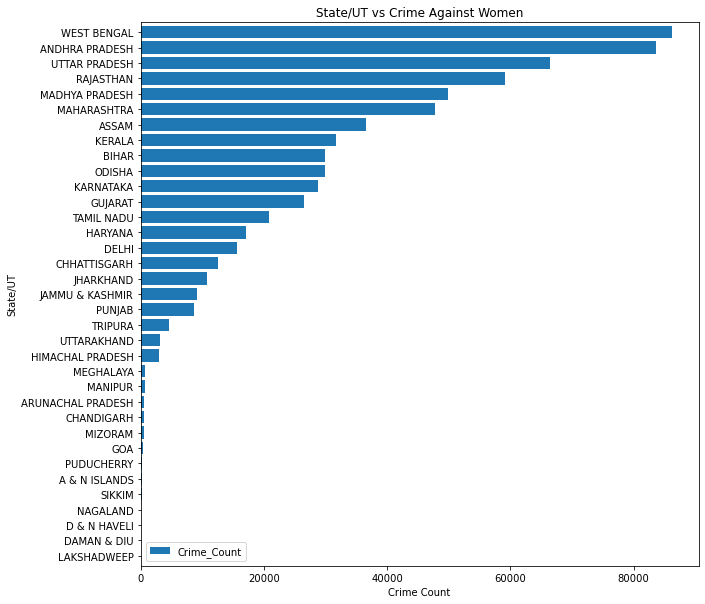

In [243]:
#Finding crime against women state wise
#West Bengal has more crime against women
df_womencrime_count.index
df_womencrime_count=pd.DataFrame({'State/UT':df_womencrime_count.index, 'Crime_Count':df_womencrime_count['Total_Count']})
df_womencrime_count.plot(x='State/UT', y='Crime_Count', rot=0,kind='barh',figsize=(10,10),width=0.8)
plt.title("State/UT vs Crime Against Women")
plt.xlabel("Crime Count")
plt.ylabel("State/UT")

In [244]:
total_df


,State/UT
28,TOTAL (STATES)
36,TOTAL (UTs)
37,TOTAL (ALL-INDIA)


In [245]:
total_df=df[df['STATE/UT']=='TOTAL (ALL-INDIA)']
year_wise_count=pd.DataFrame([])

year_wise_count=total_df.agg({'CASES REGISTERED - 2010':'sum','CASES REGISTERED - 2011':'sum','CASES REGISTERED - 2012':'sum'})

In [246]:
year_wise_count

CASES REGISTERED - 2010    427170
CASES REGISTERED - 2011    457300
CASES REGISTERED - 2012    488540
dtype: int64

Text(0, 0.5, 'Year')

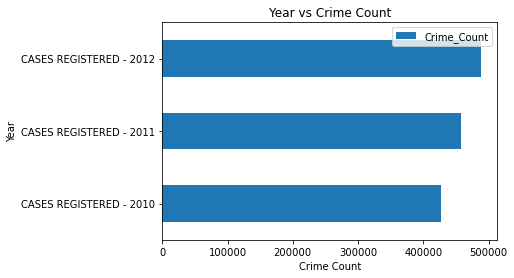

In [247]:
#Finding year wise crime count
#2012 year has more crime cases
df_womencrime_count.index
df_womencrime_count=pd.DataFrame({'Year':year_wise_count.index, 'Crime_Count':year_wise_count.values})
df_womencrime_count.plot(x='Year', y='Crime_Count', rot=0,kind='barh')
plt.title("Year vs Crime Count")
plt.xlabel("Crime Count")
plt.ylabel("Year")



In [287]:
state_crime_head=df.groupby(['STATE/UT','CRIME HEAD']).agg({'CASES REGISTERED - 2010':'sum','CASES REGISTERED - 2011':'sum','CASES REGISTERED - 2012':'sum'}).reset_index()
state_crime_head['Total_Count']=state_crime_head['CASES REGISTERED - 2010']+state_crime_head['CASES REGISTERED - 2011']+state_crime_head['CASES REGISTERED - 2012']
state_crime_head=state_crime_head[(~state_crime_head['STATE/UT'].str.contains('TOTAL')) & (~state_crime_head['CRIME HEAD'].str.contains('TOTAL'))]
print(state_crime_head['STATE/UT'].unique())
print(state_crime_head['CRIME HEAD'].unique())
state_crime_head=state_crime_head.sort_values(by=['Total_Count'])

state_crime_head_pivot =state_crime_head.pivot(index='STATE/UT',columns='CRIME HEAD')['Total_Count']
state_crime_head_pivot


['A & N ISLANDS' 'ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR'
 'CHANDIGARH' 'CHHATTISGARH' 'D & N HAVELI' 'DAMAN & DIU' 'DELHI' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'LAKSHADWEEP' 'MADHYA PRADESH' 'MAHARASHTRA'
 'MANIPUR' 'MEGHALAYA' 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUDUCHERRY' 'PUNJAB'
 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU' 'TRIPURA' 'UTTAR PRADESH' 'UTTARAKHAND'
 'WEST BENGAL']
['ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY'
 'COMMISSION OF SATI (PREVENTION) ACT, 1987'
 'CRUELTY BY HUSBAND OR HIS RELATIVES' 'DOWRY DEATHS'
 'DOWRY PROHIBITION ACT, 1961' 'IMMORAL TRAFFIC (P) ACT, 1956'
 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRY'
 'INDECENT REPRESENTATION OF WOMEN (PROHIBITION) ACT, 1986'
 'INSULT TO THE MODESTY OF WOMEN'
 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS' 'RAPE']


,STATE/UT,CRIME HEAD,CASES REGISTERED - 2010,CASES REGISTERED - 2011,CASES REGISTERED - 2012,Total_Count
295,NAGALAND,INDECENT REPRESENTATION OF WOMEN (PROHIBITION)...,0,0,0,0
294,NAGALAND,IMPORTATION OF GIRLS FROM FOREIGN COUNTRY,0,0,0,0
361,TAMIL NADU,"COMMISSION OF SATI (PREVENTION) ACT, 1987",0,0,0,0
145,HARYANA,"COMMISSION OF SATI (PREVENTION) ACT, 1987",0,0,0,0
246,MAHARASHTRA,IMPORTATION OF GIRLS FROM FOREIGN COUNTRY,0,0,0,0
366,TAMIL NADU,IMPORTATION OF GIRLS FROM FOREIGN COUNTRY,0,0,0,0
139,GUJARAT,INDECENT REPRESENTATION OF WOMEN (PROHIBITION)...,0,0,0,0
138,GUJARAT,IMPORTATION OF GIRLS FROM FOREIGN COUNTRY,0,0,0,0
133,GUJARAT,"COMMISSION OF SATI (PREVENTION) ACT, 1987",0,0,0,0
409,TRIPURA,"COMMISSION OF SATI (PREVENTION) ACT, 1987",0,0,0,0


Text(0, 0.5, 'State')

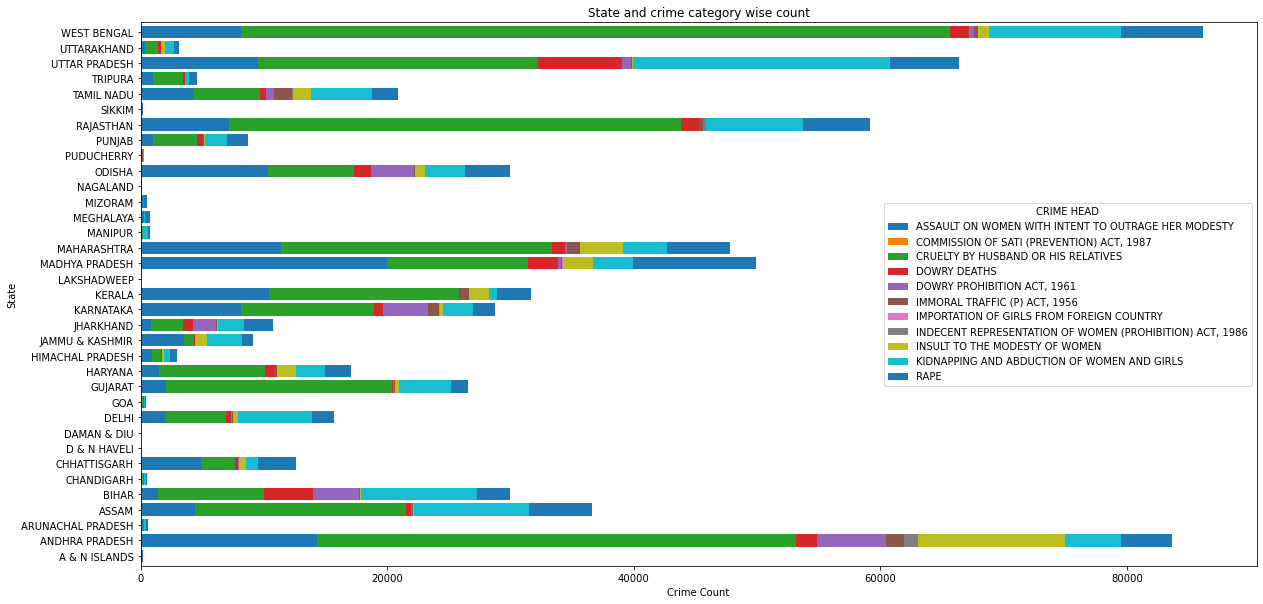

In [290]:
#State and crime category wise count


state_crime_head_pivot.plot( rot=0,kind='barh',stacked=True,figsize=(20,10),width=0.8)
plt.title("State and crime category wise count")
plt.xlabel("Crime Count")
plt.ylabel("State")
